In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

# EDA

In [2]:
# Read csv file
titanic = pd.read_csv('titanic/train.csv')
titanic_test = pd.read_csv('titanic/test.csv')

In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(f'Titanic Columns = {titanic.columns}')
print(f'Titanic Test Columns = {titanic_test.columns}')

Titanic Columns = Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Titanic Test Columns = Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


What is the meaning of `'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'` ?

|Variable|Definition|Key|
|--------|----------|---|
|Survival|Survival Passenger|0 = No, 1 = Yes|
|Pclass  |Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex     |Gender||
|Age     |Age||
|SibSP   |Siblings / Spouses ||
|Parch   |Parents / Children ||
|Ticket  |Ticket Number||
|Fare    |Passenger paid for||
|Cabin   |Cabin Number||
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|
|Name|Name of passenger||
|PassengerID|Passenger id||

This dataset is for classify of survived or not surivived passenger on the titanic disaster, so the `Survival` variable is label, else is features

## NaN Data

Check NaN Values, and replacing them

NaN value: 
Age: 177
Cabin: 687
Embarked: 2


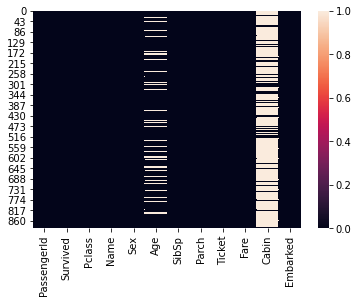

In [6]:
_ = sns.heatmap(titanic.isna())

print('NaN value: ')
for key, value in titanic.isna().sum().to_dict().items():
    if value != 0:
        print(f"{key}: {value}")

False


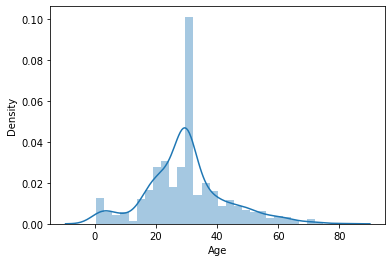

In [7]:
# Replacing nan with mean
titanic['Age'] = titanic['Age'].replace(np.nan, titanic['Age'].mean())

# Checking if still any nan data
print(titanic['Age'].isna().any())

_ = sns.distplot(titanic['Age'])

Total Non Nan Value: 204
NaN data? True


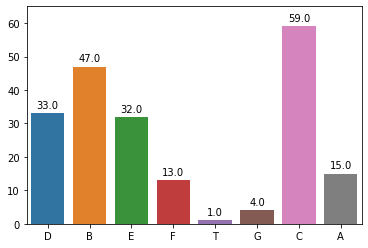

In [8]:
# See non- NaN value data in Cabin
alp_data = []
for data in titanic['Cabin'].values:
    if type(data) != float:
        alp_data.append(data[0])

result = 0
letters = []
count_letters = []
for i in list(set(alp_data)):
    letters.append(i)
    count_letters.append(np.unique(titanic['Cabin'].str.startswith(i, na=False).values, return_counts=True)[1][1])
    result += np.unique(titanic['Cabin'].str.startswith(i, na=False).values, return_counts=True)[1][1]

print(f"Total Non Nan Value: {result}")

splot = sns.barplot(x=letters, y=count_letters)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 65)

# Checking NaN data is still available?
print(f"NaN data? {titanic['Cabin'].isna().any()}")

Total Non Nan Value: 891
NaN data? False


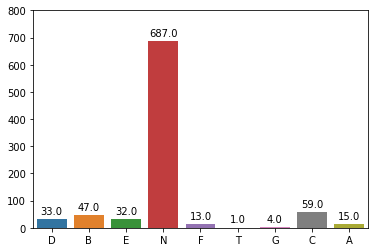

In [9]:
# Replace nan value to something letter in alphabet, and replacing Cabin ID with first letter of the Cabin ID
titanic['Cabin'].fillna('N_cabin', inplace=True) # change to N

for i in list(set(alp_data)):
    # replace Cabin ID with first letter of the Cabin ID   
    titanic.loc[titanic['Cabin'].str.startswith(i), 'Cabin'] = f"{i}_cabin" 

# See non- NaN value data in Cabin
alp_data = []
for data in titanic['Cabin'].values:
    if type(data) != float:
        alp_data.append(data[0])

result = 0
letters = []
count_letters = []
for i in list(set(alp_data)):
    letters.append(i)
    count_letters.append(np.unique(titanic['Cabin'].str.startswith(i, na=False).values, return_counts=True)[1][1])
    result += np.unique(titanic['Cabin'].str.startswith(i, na=False).values, return_counts=True)[1][1]

print(f"Total Non Nan Value: {result}")

splot = sns.barplot(x=letters, y=count_letters)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

# NaN data is still available?
print(f"NaN data? {titanic['Cabin'].isna().any()}")

NaN Value: 2


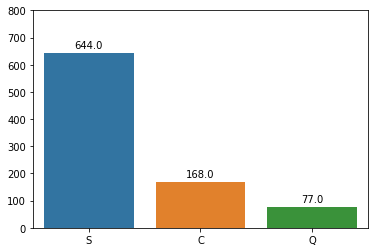

In [10]:
# How much NaN Value
print(f"NaN Value: {titanic['Embarked'].isna().value_counts().values[1]}")

# How much non NaN Value
splot = sns.barplot(x=list(titanic['Embarked'].value_counts().index), y=titanic['Embarked'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

NaN Value? False


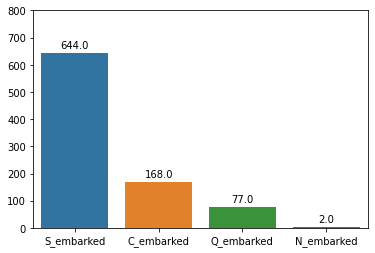

In [11]:
titanic['Embarked'].fillna('N', inplace=True) # change to N

for i in list(titanic['Embarked'].value_counts().index):
    titanic.loc[titanic['Embarked'].str.startswith(i), 'Embarked'] = f"{i}_embarked" 

# is NaN value is still available
print(f"NaN Value? {titanic['Embarked'].isna().any()}")

# How much non NaN Value
splot = sns.barplot(x=list(titanic['Embarked'].value_counts().index), y=titanic['Embarked'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

NaN value: 


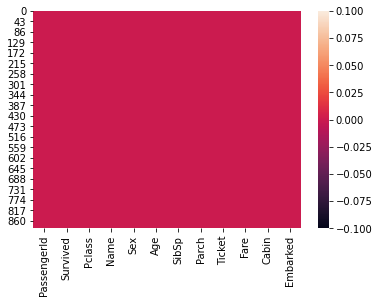

In [12]:
# is NaN value is still available?

_ = sns.heatmap(titanic.isna())

print('NaN value: ')
for key, value in titanic.isna().sum().to_dict().items():
    if value != 0:
        print(f"{key}: {value}")

# yeah, that's gone

## Visualizing the data

Now, is visualizing the data

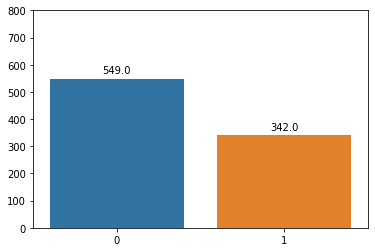

In [13]:
# it's time to visualizing the data

# Survived columns
splot = sns.barplot(x=list(titanic['Survived'].value_counts().index), y=titanic['Survived'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

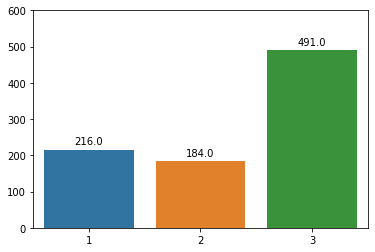

In [14]:
# Pclass columns
splot = sns.barplot(x=list(titanic['Pclass'].value_counts().index), y=titanic['Pclass'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 600)

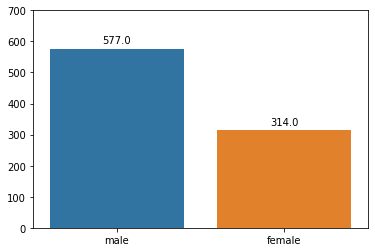

In [15]:
# Sex
splot = sns.barplot(x=list(titanic['Sex'].value_counts().index), y=titanic['Sex'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 700)

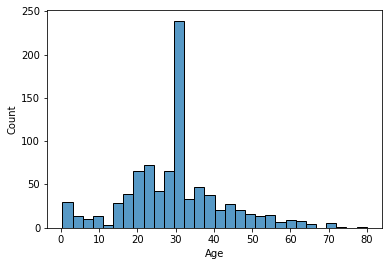

In [16]:
# Age
_ = sns.histplot(titanic['Age'])

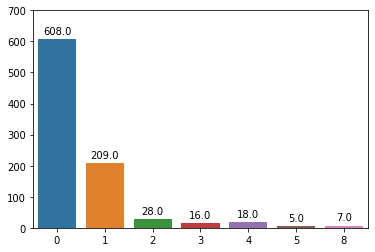

In [17]:
# SibSp
splot = sns.barplot(x=list(titanic['SibSp'].value_counts().index), y=titanic['SibSp'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 700)

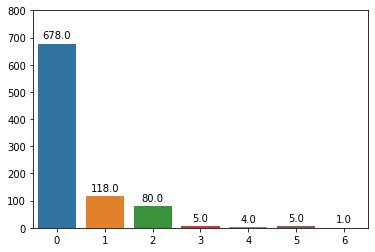

In [18]:
# Parch
splot = sns.barplot(x=list(titanic['Parch'].value_counts().index), y=titanic['Parch'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

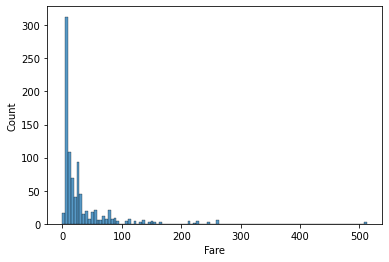

In [19]:
# Fare
_ = sns.histplot(titanic['Fare'])

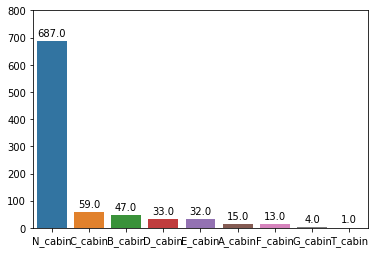

In [20]:
# Cabin
splot = sns.barplot(x=list(titanic['Cabin'].value_counts().index), y=titanic['Cabin'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

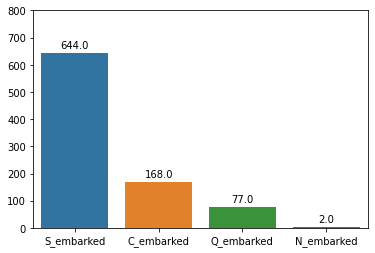

In [21]:
# Embarked
splot = sns.barplot(x=list(titanic['Embarked'].value_counts().index), y=titanic['Embarked'].value_counts().values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
_ = plt.ylim(0, 800)

## One hot encoding

One hot encoding and converting all dataset to one datatype (float64)

In [22]:
'''
non float64 is Survived, Pclass, Sex, 
               SibSp, Parch, Cabin and Embarked
'''
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [23]:
# Now, this is the columns after one hot encoding
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
# After it, we convert non float64 to float64
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Convert int64 to float64

In [25]:
# first, with int64 to float64
for variable, dtype in titanic.dtypes.items():
    if dtype == 'int64':
        titanic[variable] = titanic[variable].astype('float64')

In [26]:
print(titanic.dtypes)

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


One hot encoding

In [27]:
# Next, we convert object to float64 and one encoding them

# First, 'name' column
for num, name in enumerate(titanic['Name']):
    titanic.loc[titanic['Name'] == name, 'Name'] = num+1

# Second, 'Sex' column
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

# Third, 'Embarked' column
for num, cols in enumerate(list(titanic['Embarked'].value_counts().keys())):
    titanic.loc[titanic['Embarked'] == cols, 'Embarked'] = num
    
# Forth, 'Cabin' column
for num, cols in enumerate(list(titanic['Cabin'].value_counts().keys())):
    titanic.loc[titanic['Cabin'] == cols, 'Cabin'] = num
    
# Fifth, 'Ticket' column
for num, name in enumerate(titanic['Ticket']):
    titanic.loc[titanic['Ticket'] == name, 'Ticket'] = num+1

In [28]:
titanic.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Convert object to float64

In [29]:
# object to float64
for variable, dtype in titanic.dtypes.items():
    if dtype == 'object':
        titanic[variable] = titanic[variable].astype('float64')

In [30]:
titanic.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name           float64
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object

Now, is filtering data with distribution based on survived person, selecting which is for training dataset

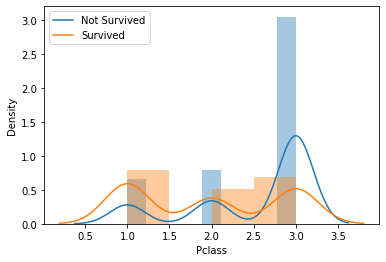

In [31]:
# How many survived based on Pclass
plt.figure()
sns.distplot(titanic['Pclass'][titanic['Survived'] == 0])
sns.distplot(titanic['Pclass'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think Pclass is required as a feature on the dataset, so Pclass shouldn't we drop for training dataset

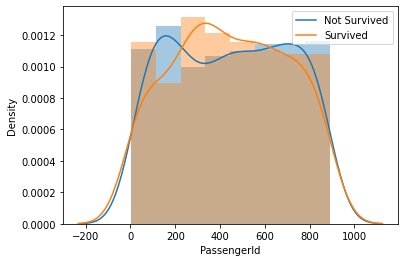

In [32]:
# How many survived based on PassengerId
plt.figure()
sns.distplot(titanic['PassengerId'][titanic['Survived'] == 0])
sns.distplot(titanic['PassengerId'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think PassengerId is not required as a feature on the dataset, 
# so PassengerId should we drop for training dataset

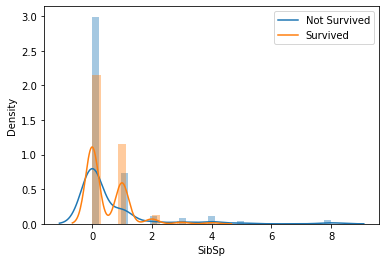

In [33]:
# How many survived based on SibSp
plt.figure()
sns.distplot(titanic['SibSp'][titanic['Survived'] == 0])
sns.distplot(titanic['SibSp'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think SibSp is required as a feature on the dataset, so SibSp shouldn't we drop for training dataset

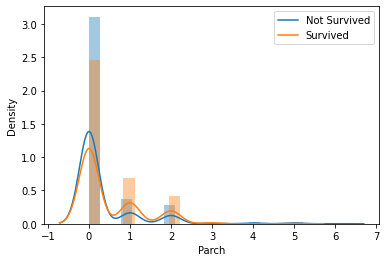

In [34]:
# How many survived based on Parch
plt.figure()
sns.distplot(titanic['Parch'][titanic['Survived'] == 0])
sns.distplot(titanic['Parch'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think Parch is required as a feature on the dataset, so Parch shouldn't we drop for training dataset

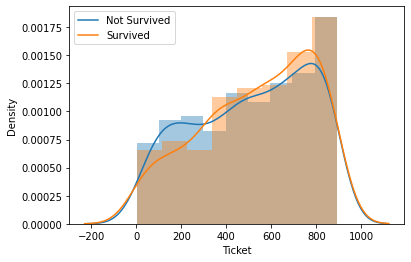

In [35]:
# How many survived based on Ticket
plt.figure()
sns.distplot(titanic['Ticket'][titanic['Survived'] == 0])
sns.distplot(titanic['Ticket'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think Ticket is not required as a feature on the dataset, 
# so Ticket should we drop for training dataset

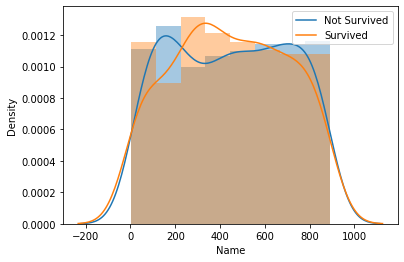

In [36]:
# How many survived based on Name
plt.figure()
sns.distplot(titanic['Name'][titanic['Survived'] == 0])
sns.distplot(titanic['Name'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think Name is not required as a feature on the dataset, 
# so Ticket should we drop for training dataset

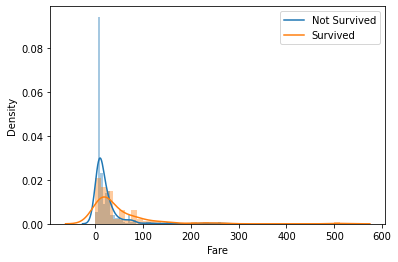

In [37]:
# How many survived based on Fare
plt.figure()
sns.distplot(titanic['Fare'][titanic['Survived'] == 0])
sns.distplot(titanic['Fare'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think Fare is not required as a feature on the dataset, 
# so Ticket should we drop for training dataset

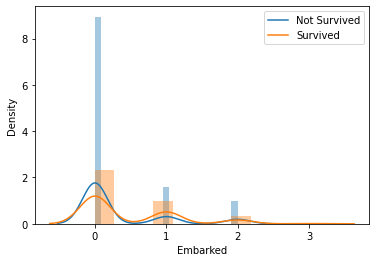

In [38]:
# How many survived based on Embarked
plt.figure()
sns.distplot(titanic['Embarked'][titanic['Survived'] == 0])
sns.distplot(titanic['Embarked'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think Embarked is required as a feature on the dataset, so Parch shouldn't we drop for training dataset

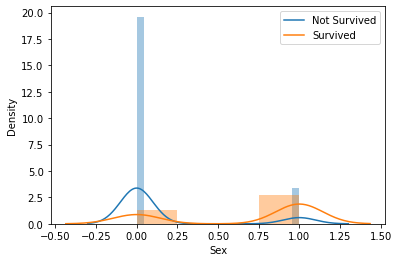

In [39]:
# How many survived based on Sex
plt.figure()
sns.distplot(titanic['Sex'][titanic['Survived'] == 0])
sns.distplot(titanic['Sex'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think Sex is required as a feature on the dataset, so Parch shouldn't we drop for training dataset

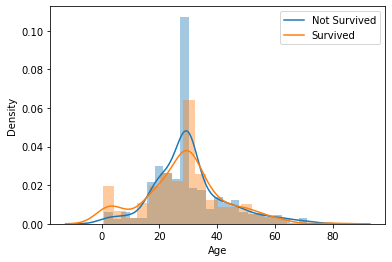

In [40]:
# How many survived based on Age
plt.figure()
sns.distplot(titanic['Age'][titanic['Survived'] == 0])
sns.distplot(titanic['Age'][titanic['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])

# I think Age is required as a feature on the dataset, so Parch shouldn't we drop for training dataset

In conclusion, we should drop `'PassengerId', 'Ticket', 'Name', 'Fare'`

In [41]:
# Splitting PassengerId from dataframe
passenger_id = titanic['PassengerId']
passenger_id_test = titanic_test['PassengerId']

# Drop non required columns from dataframe
titanic = titanic.drop(['Ticket', 'Fare' ,'Name','PassengerId'], axis=1)
titanic_test = titanic_test.drop(['Ticket', 'Fare' ,'Name','PassengerId'], axis=1)

In [42]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0.0,3.0,0.0,22.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,38.0,1.0,0.0,1.0,1.0
2,1.0,3.0,1.0,26.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,35.0,1.0,0.0,1.0,0.0
4,0.0,3.0,0.0,35.0,0.0,0.0,0.0,0.0


## Detecting outlier

See data distribution (again)

In [43]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')

In [44]:
# removing outliers with Z-score
from scipy import stats
titanic_outliers = titanic[(np.abs(stats.zscore(titanic)) < 3).all(axis=1)]

In [45]:
titanic_outliers.shape

(806, 8)

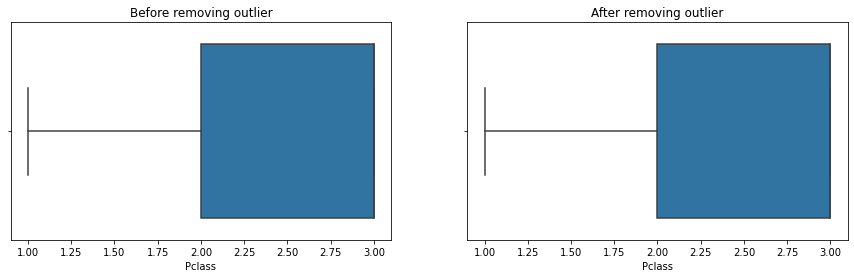

In [46]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(titanic['Pclass'])
plt.title('Before removing outlier')

plt.subplot(1,2,2)
sns.boxplot(titanic_outliers['Pclass'])
_ = plt.title('After removing outlier')

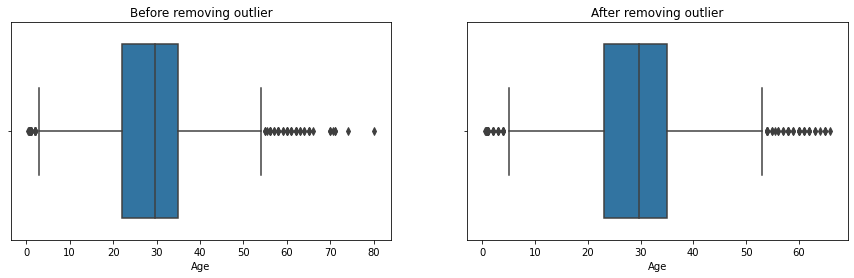

In [47]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(titanic['Age'])
plt.title('Before removing outlier')

plt.subplot(1,2,2)
sns.boxplot(titanic_outliers['Age'])
_ = plt.title('After removing outlier')

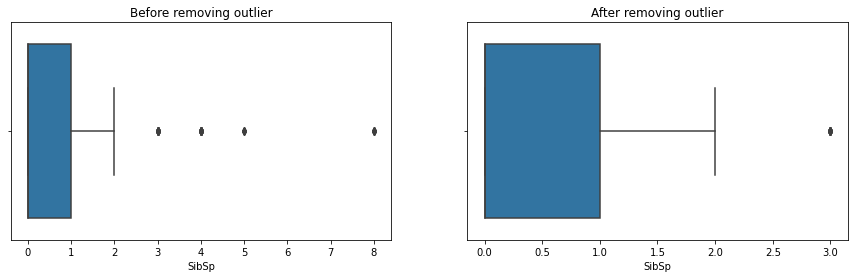

In [48]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(titanic['SibSp'])
plt.title('Before removing outlier')

plt.subplot(1,2,2)
sns.boxplot(titanic_outliers['SibSp'])
_ = plt.title('After removing outlier')

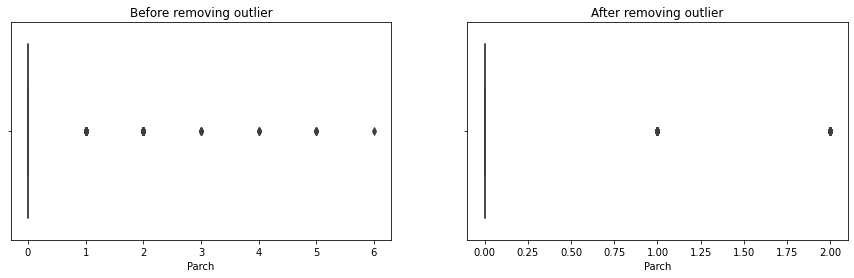

In [49]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(titanic['Parch'])
plt.title('Before removing outlier')

plt.subplot(1,2,2)
sns.boxplot(titanic_outliers['Parch'])
_ = plt.title('After removing outlier')

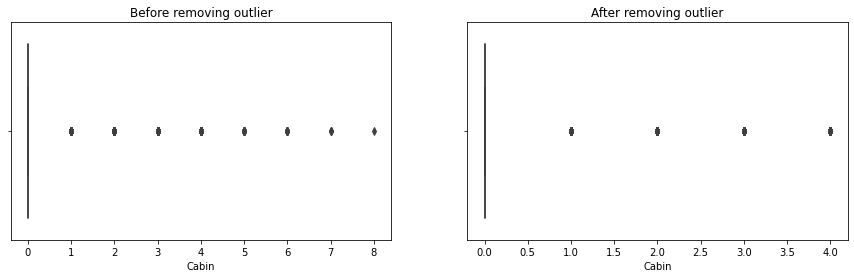

In [50]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(titanic['Cabin'])
plt.title('Before removing outlier')

plt.subplot(1,2,2)
sns.boxplot(titanic_outliers['Cabin'])
_ = plt.title('After removing outlier')

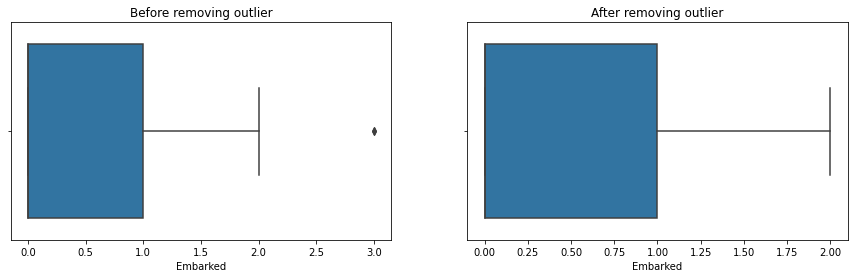

In [51]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(titanic['Embarked'])
plt.title('Before removing outlier')

plt.subplot(1,2,2)
sns.boxplot(titanic_outliers['Embarked'])
_ = plt.title('After removing outlier')

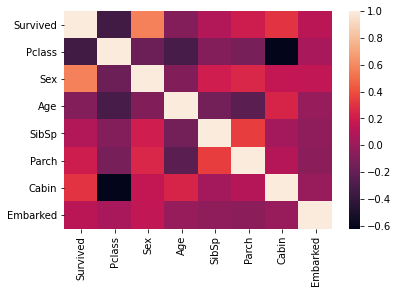

In [52]:
_ = sns.heatmap(titanic_outliers.corr())

# Let's Train

0.0    490
1.0    316
Name: Survived, dtype: int64


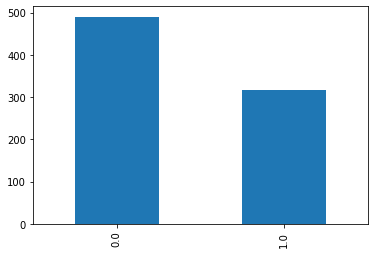

In [53]:
titanic_outliers['Survived'].value_counts().plot(kind='bar')
print(titanic_outliers['Survived'].value_counts())

In [54]:
# resample to make data balance
from sklearn.utils import resample
def resampling_dataset(df):
    df0 = df[df['Survived']==0]
    df1 = df[df['Survived']==1]
    df_resample = resample(df1, replace=True, 
                            n_samples=df['Survived'].value_counts()[0], random_state=123)
    df = pd.concat([df0, df_resample])
    return df
titanic_resampled = resampling_dataset(titanic_outliers)

In [55]:
X = titanic_resampled.drop(['Survived'], axis=1)
y = titanic_resampled['Survived']

0.0    490
1.0    490
Name: Survived, dtype: int64


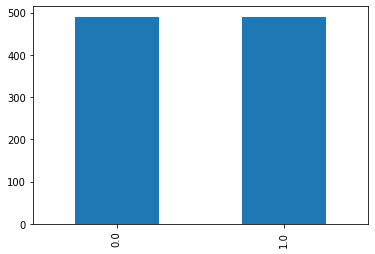

In [56]:
titanic_resampled['Survived'].value_counts().plot(kind='bar')
print(titanic_resampled['Survived'].value_counts())

In [57]:
# convert y to array
y = np.array(y)

In [58]:
# before normalizing
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,2.261224,0.413265,29.218976,0.387755,0.298980,0.523469,0.400000
std,0.841424,0.492671,12.454012,0.638126,0.602513,1.112865,0.649664
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,66.000000,3.000000,2.000000,4.000000,2.000000


In [59]:
# lets normalize the dataset using StandarScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X) # convert it to array then normalizing

In [60]:
# after normalizing
X.shape

(980, 7)

In [61]:
X

array([[1.        , 0.        , 0.32906374, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.52729491, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.44646413, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.4663007 , ..., 0.5       , 0.        ,
        0.        ],
       [0.5       , 1.        , 0.25282098, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 1.        , 0.58828911, ..., 0.        , 1.        ,
        0.        ]])

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [63]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(784, 7) (196, 7) (784,) (196,)


In [64]:
# adding dataset to model
# using Machine Learning method

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import precision_score,accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

models =[("Logistic Regression", LogisticRegression()),
         ("Support Vector Machines", SVC()),
         ('K-Nearest Neighbors',KNeighborsClassifier()),
         ("Decision Tree Classifier", DecisionTreeClassifier()),
         ("Gaussian Naive Bayes", GaussianNB()),
         ("Stocastic Gradient Descend", SGDClassifier()),
         ("Perceptron", Perceptron()),
         ("Nearest Centroid",NearestCentroid()),
         ("Ridge", RidgeClassifier()),
         ("Nu Support Vector Machines", NuSVC()),
         ("Bernoulli Naive Bayes", BernoulliNB()),
         ('Random Forest',RandomForestClassifier()),
         ('AdaBoost',AdaBoostClassifier()),
         ('XGB',GradientBoostingClassifier()),
         ('PAC',PassiveAggressiveClassifier())]


names = []
scores = []
results = {}

for name,model in models:
    
    names.append(name)
    
    model.fit(x_train, y_train)
    
    result = model.predict(x_test)
    score = accuracy_score(y_test, result)*100
    scores.append(score)
    
for key in names:
    for value in scores:
        results[key] = f'{value:.2f}%'
        scores.remove(value)
        break

results = sorted(results.items(), key=lambda x: x[1], reverse=True)
results_df = pd.DataFrame.from_dict(results)
results_df = results_df.rename(columns={0: 'Model', 1:'Score'})
results_df

,Model,Score
0,Support Vector Machines,89.29%
1,XGB,88.78%
2,Nu Support Vector Machines,88.27%
3,K-Nearest Neighbors,86.73%
4,Random Forest,86.22%
5,Gaussian Naive Bayes,85.20%
6,Stocastic Gradient Descend,85.20%
7,Nearest Centroid,85.20%
8,Decision Tree Classifier,84.69%
9,Ridge,84.69%


In [65]:
# using deep learning method

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') > (0.82) and logs.get('accuracy') > (0.82)):
            print("\nSTOPPU")
            self.model.stop_training = True



model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu',input_dim=x_train.shape[1]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.summary()

callbacks = myCallback()
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(), metrics=['mse', 'mae','accuracy']) #mse

model.fit(x_train, y_train, validation_split=0.2, epochs=500, verbose=1, callbacks=[callbacks])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
20/20 [==============================] - 2s 75ms/step - loss: 0.2440 - mse: 0.2440 - mae: 0.4937 - accuracy: 0.6

Epoch 36/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1435 - mse: 0.1435 - mae: 0.2946 - accuracy: 0.8031 - val_loss: 0.1367 - val_mse: 0.1367 - val_mae: 0.2879 - val_accuracy: 0.8344
Epoch 37/500
20/20 [==============================] - 0s 5ms/step - loss: 0.1378 - mse: 0.1378 - mae: 0.2878 - accuracy: 0.8188 - val_loss: 0.1378 - val_mse: 0.1378 - val_mae: 0.2887 - val_accuracy: 0.8408
Epoch 38/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1351 - mse: 0.1351 - mae: 0.2815 - accuracy: 0.8018 - val_loss: 0.1400 - val_mse: 0.1400 - val_mae: 0.2901 - val_accuracy: 0.8280
Epoch 39/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1313 - mse: 0.1313 - mae: 0.2778 - accuracy: 0.8208 - val_loss: 0.1380 - val_mse: 0.1380 - val_mae: 0.2867 - val_accuracy: 0.8471
Epoch 40/500
20/20 [==============================] - 0s 4ms/step - loss: 0.1265 - mse: 0.1265 - mae: 0.2725 - accuracy: 0.8342 - val_loss: 0.1410 - val_mse: 0.1410 - val_mae: 

In [66]:
predictions = model.predict(x_test)
def see_score(y_validate, predictions, threshold):
    test = [x for x in predictions]
    pred = []
    for x in test:
        if x[0] > threshold: # Higher Threshold
            pred.append(1)
        else:                # Lower Threshold
            pred.append(0)
    tn, fp, fn, tp = confusion_matrix(y_validate, pred).ravel()
    print(f"Threshold = {threshold}: \n1: {pred.count(1)}, 0: {pred.count(0)}, Accuracy: {accuracy_score(y_validate, pred)}")
    print(f'True 1: {tp}, True 0: {tn}, False 1: {fp}, False 0: {fn}')
    print(f'Predicted True: {tp+tn}, Predicted False: {fp+fn}\n')
    
    
for i in range(101):
    see_score(y_test, predictions, i/100)

Threshold = 0.0: 
1: 196, 0: 0, Accuracy: 0.44387755102040816
True 1: 87, True 0: 0, False 1: 109, False 0: 0
Predicted True: 87, Predicted False: 109

Threshold = 0.01: 
1: 196, 0: 0, Accuracy: 0.44387755102040816
True 1: 87, True 0: 0, False 1: 109, False 0: 0
Predicted True: 87, Predicted False: 109

Threshold = 0.02: 
1: 196, 0: 0, Accuracy: 0.44387755102040816
True 1: 87, True 0: 0, False 1: 109, False 0: 0
Predicted True: 87, Predicted False: 109

Threshold = 0.03: 
1: 196, 0: 0, Accuracy: 0.44387755102040816
True 1: 87, True 0: 0, False 1: 109, False 0: 0
Predicted True: 87, Predicted False: 109

Threshold = 0.04: 
1: 196, 0: 0, Accuracy: 0.44387755102040816
True 1: 87, True 0: 0, False 1: 109, False 0: 0
Predicted True: 87, Predicted False: 109

Threshold = 0.05: 
1: 196, 0: 0, Accuracy: 0.44387755102040816
True 1: 87, True 0: 0, False 1: 109, False 0: 0
Predicted True: 87, Predicted False: 109

Threshold = 0.06: 
1: 196, 0: 0, Accuracy: 0.44387755102040816
True 1: 87, True 0: 

Threshold = 0.58: 
1: 81, 0: 115, Accuracy: 0.8673469387755102
True 1: 71, True 0: 99, False 1: 10, False 0: 16
Predicted True: 170, Predicted False: 26

Threshold = 0.59: 
1: 80, 0: 116, Accuracy: 0.8622448979591837
True 1: 70, True 0: 99, False 1: 10, False 0: 17
Predicted True: 169, Predicted False: 27

Threshold = 0.6: 
1: 78, 0: 118, Accuracy: 0.8520408163265306
True 1: 68, True 0: 99, False 1: 10, False 0: 19
Predicted True: 167, Predicted False: 29

Threshold = 0.61: 
1: 77, 0: 119, Accuracy: 0.8469387755102041
True 1: 67, True 0: 99, False 1: 10, False 0: 20
Predicted True: 166, Predicted False: 30

Threshold = 0.62: 
1: 74, 0: 122, Accuracy: 0.8520408163265306
True 1: 66, True 0: 101, False 1: 8, False 0: 21
Predicted True: 167, Predicted False: 29

Threshold = 0.63: 
1: 74, 0: 122, Accuracy: 0.8520408163265306
True 1: 66, True 0: 101, False 1: 8, False 0: 21
Predicted True: 167, Predicted False: 29

Threshold = 0.64: 
1: 72, 0: 124, Accuracy: 0.8520408163265306
True 1: 65, Tr

# Let's Predict titanic_test

In [67]:
print(passenger_id_test)
print(titanic_test)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64
     Pclass     Sex   Age  SibSp  Parch Cabin Embarked
0         3    male  34.5      0      0   NaN        Q
1         3  female  47.0      1      0   NaN        S
2         2    male  62.0      0      0   NaN        Q
3         3    male  27.0      0      0   NaN        S
4         3  female  22.0      1      1   NaN        S
..      ...     ...   ...    ...    ...   ...      ...
413       3    male   NaN      0      0   NaN        S
414       1  female  39.0      0      0  C105        C
415       3    male  38.5      0      0   NaN        S
416       3    male   NaN      0      0   NaN        S
417       3    male   NaN      1      1   NaN        C

[418 rows x 7 columns]


In [68]:
titanic_test.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Cabin        True
Embarked    False
dtype: bool

In [69]:
# Replacing nan with mean
titanic_test['Age'] = titanic_test['Age'].replace(np.nan, titanic_test['Age'].mean())
titanic_test['Age'].isna().any()

False

In [70]:
# See non- NaN value data in Cabin
alp_data = []
for data in titanic_test['Cabin'].values:
    if type(data) != float:
        alp_data.append(data[0])

# Replace nan value to something letter in alphabet, and replacing Cabin ID with first letter of the Cabin ID
titanic_test['Cabin'].fillna('N_cabin', inplace=True) # change to N

for i in list(set(alp_data)):
    # replace Cabin ID with first letter of the Cabin ID
    titanic_test.loc[titanic_test['Cabin'].str.startswith(i), 'Cabin'] = f"{i}_cabin"
    
titanic_test['Cabin'].isna().any()

False

In [71]:
titanic_test.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Cabin       False
Embarked    False
dtype: bool

In [72]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.50000,0,0,N_cabin,Q
1,3,female,47.00000,1,0,N_cabin,S
2,2,male,62.00000,0,0,N_cabin,Q
3,3,male,27.00000,0,0,N_cabin,S
4,3,female,22.00000,1,1,N_cabin,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,N_cabin,S
414,1,female,39.00000,0,0,C_cabin,C
415,3,male,38.50000,0,0,N_cabin,S
416,3,male,30.27259,0,0,N_cabin,S


In [73]:
'''
non float64 is Survived, Pclass, Sex, 
               SibSp, Parch, Cabin and Embarked
'''
print(titanic_test.dtypes)

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object


In [74]:
# then, first i will convert object datatype to float

titanic_test.loc[titanic_test['Sex'] == 'male', 'Sex'] = 0
titanic_test.loc[titanic_test['Sex'] == 'female', 'Sex'] = 1

for num, cols in enumerate(list(titanic_test['Embarked'].value_counts().keys())):
    titanic_test.loc[titanic_test['Embarked'] == cols, 'Embarked'] = num
    
for num, cols in enumerate(list(titanic_test['Cabin'].value_counts().keys())):
    titanic_test.loc[titanic_test['Cabin'] == cols, 'Cabin'] = num
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,0,34.50000,0,0,0,2
1,3,1,47.00000,1,0,0,0
2,2,0,62.00000,0,0,0,2
3,3,0,27.00000,0,0,0,0
4,3,1,22.00000,1,1,0,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,0,0
414,1,1,39.00000,0,0,1,1
415,3,0,38.50000,0,0,0,0
416,3,0,30.27259,0,0,0,0


In [75]:
# there is still int64 datatype
print(titanic_test.dtypes)

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Cabin        object
Embarked     object
dtype: object


In [76]:
# convert int64 to float64
titanic_test['Pclass'] = titanic_test['Pclass'].astype('float64')
titanic_test['SibSp'] = titanic_test['SibSp'].astype('float64')
titanic_test['Parch'] = titanic_test['Parch'].astype('float64')
titanic_test['Sex'] = titanic_test['Sex'].astype('float64')
titanic_test['Cabin'] = titanic_test['Cabin'].astype('float64')
titanic_test['Embarked'] = titanic_test['Embarked'].astype('float64')

# is converted?
print(titanic_test.dtypes)

Pclass      float64
Sex         float64
Age         float64
SibSp       float64
Parch       float64
Cabin       float64
Embarked    float64
dtype: object


In [77]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3.0,0.0,34.50000,0.0,0.0,0.0,2.0
1,3.0,1.0,47.00000,1.0,0.0,0.0,0.0
2,2.0,0.0,62.00000,0.0,0.0,0.0,2.0
3,3.0,0.0,27.00000,0.0,0.0,0.0,0.0
4,3.0,1.0,22.00000,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
413,3.0,0.0,30.27259,0.0,0.0,0.0,0.0
414,1.0,1.0,39.00000,0.0,0.0,1.0,1.0
415,3.0,0.0,38.50000,0.0,0.0,0.0,0.0
416,3.0,0.0,30.27259,0.0,0.0,0.0,0.0


In [78]:
X_test = titanic_test

In [79]:
# lets normalize the dataset using StandarScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale = MinMaxScaler()
X_test = scale.fit_transform(X_test) # convert it to array then normalizing

In [80]:
X_test

array([[1.        , 0.        , 0.4527232 , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.61756561, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.8153765 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.50547277, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.39697468, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.39697468, ..., 0.11111111, 0.        ,
        0.5       ]])

In [81]:
# after normalizing
X_test.shape

(418, 7)

In [82]:
# using machine learning
model1 = RandomForestClassifier()
model1.fit(x_test, y_test)
model1_result = model1.predict(X_test)
model1_result = model1_result.astype('int64')

# write it to csv
raw_submission_ml = {
        "PassengerId": passenger_id_test.values,
        "Survived": model1_result
    }
submission_ml = pd.DataFrame(data=raw_submission_ml)
submission_ml.to_csv('submission/submission_ml1.csv', index=False)
submission_ml

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [83]:
# using machine learning
model2 = GradientBoostingClassifier()
model2.fit(x_test, y_test)
model2_result = model2.predict(X_test)
model2_result = model2_result.astype('int64')

# write it to csv
raw_submission_ml2 = {
        "PassengerId": passenger_id_test.values,
        "Survived": model2_result
    }
submission_ml2 = pd.DataFrame(data=raw_submission_ml2)
submission_ml2.to_csv('submission/submission_ml2.csv', index=False)
submission_ml2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [84]:
# using machine learning
model3 = DecisionTreeClassifier()
model3.fit(x_test, y_test)
model3_result = model3.predict(X_test)
model3_result = model3_result.astype('int64')

# write it to csv
raw_submission_ml3 = {
        "PassengerId": passenger_id_test.values,
        "Survived": model3_result
    }
submission_ml3 = pd.DataFrame(data=raw_submission_ml3)
submission_ml3.to_csv('submission/submission_ml3.csv', index=False)
submission_ml3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [85]:
# using machine learning
model4 = KNeighborsClassifier()
model4.fit(x_test, y_test)
model4_result = model4.predict(X_test)
model4_result = model4_result.astype('int64')

# write it to csv
raw_submission_ml4 = {
        "PassengerId": passenger_id_test.values,
        "Survived": model4_result
    }
submission_ml4 = pd.DataFrame(data=raw_submission_ml4)
submission_ml4.to_csv('submission/submission_ml4.csv', index=False)
submission_ml4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [86]:
# using machine learning
model5 = SVC()
model5.fit(x_test, y_test)
model5_result = model5.predict(X_test)
model5_result = model5_result.astype('int64')

# write it to csv
raw_submission_ml5 = {
        "PassengerId": passenger_id_test.values,
        "Survived": model5_result
    }
submission_ml5 = pd.DataFrame(data=raw_submission_ml5)
submission_ml5.to_csv('submission/submission_ml5.csv', index=False)
submission_ml5

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
# using machine learning
model6 = NuSVC()
model6.fit(x_test, y_test)
model6_result = model6.predict(X_test)
model6_result = model6_result.astype('int64')

# write it to csv
raw_submission_ml6 = {
        "PassengerId": passenger_id_test.values,
        "Survived": model5_result
    }
submission_ml6 = pd.DataFrame(data=raw_submission_ml6)
submission_ml6.to_csv('submission/submission_ml6.csv', index=False)
submission_ml6

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [89]:
# using Deep learning
model_result = model.predict(X_test)

def model_to_threshold(predictions, threshold):
    test = [x for x in predictions]
    pred = []
    for x in test:
        if x[0] > threshold: # Higher Threshold
            pred.append(1)
        else:                # Lower Threshold
            pred.append(0)
    return np.array(pred).astype('int64')
model_results = model_to_threshold(model_result, 0.48)

# write it to csv
raw_submission_dl = {
        "PassengerId": passenger_id_test.values,
        "Survived": model_results
    }
submission_dl = pd.DataFrame(data=raw_submission_dl)
submission_dl.to_csv('submission/submission_dl.csv', index=False)
submission_dl

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
